**1. Menghubungkan Google Drive**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2. Import library**

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

**3. Menyiapkan Dataset**

In [6]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/Potato'
train_dir = f'{base_dir}/Train'
validation_dir = f'{base_dir}/Valid'
test_dir = f'{base_dir}/Test'

**4. Cek Jumlah Gambar**

In [7]:
print("Train:")
print("Late Blight:", len(os.listdir(f'{train_dir}/Potato_late_blight')))
print("Early Blight:", len(os.listdir(f'{train_dir}/Potato_early_blight')))
print("Healthy:", len(os.listdir(f'{train_dir}/Potato_healthy')))

print("\nValidation:")
print("Late Blight:", len(os.listdir(f'{validation_dir}/Potato_late_blight')))
print("Early Blight:", len(os.listdir(f'{validation_dir}/Potato_early_blight')))
print("Healthy:", len(os.listdir(f'{validation_dir}/Potato_healthy')))

print("\nTest:")
print("Late Blight:", len(os.listdir(f'{test_dir}/Potato_late_blight')))
print("Early Blight:", len(os.listdir(f'{test_dir}/Potato_early_blight')))
print("Healthy:", len(os.listdir(f'{test_dir}/Potato_healthy')))

Train:
Late Blight: 300
Early Blight: 320
Healthy: 300

Validation:
Late Blight: 100
Early Blight: 100
Healthy: 100

Test:
Late Blight: 100
Early Blight: 100
Healthy: 100


**5. Preprocessing dan Augmentasi Data**

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

**6. Membuat Generator Data**

In [9]:
img_size = 224  # Ukuran gambar
batch_size = 8

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 920 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


**7. Membangun Model CNN**

In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.5),

    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,397,635 (169.36 MB)

 Trainable params: 44,397,635 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

**8. Kompilasi Model**

In [11]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**9. Training Model**

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 900s 8s/step - accuracy: 0.5205 - loss: 1.5422 - val_accuracy: 0.8176 - val_loss: 0.4530
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 41s 151ms/step - accuracy: 0.7628 - loss: 0.5148 - val_accuracy: 0.7568 - val_loss: 0.5697
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 21s 152ms/step - accuracy: 0.8317 - loss: 0.4246 - val_accuracy: 0.9020 - val_loss: 0.2458
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 22s 165ms/step - accuracy: 0.9052 - loss: 0.2545 - val_accuracy: 0.9020 - val_loss: 0.2369
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 18s 155ms/step - accuracy: 0.8956 - loss: 0.2507 - val_accuracy: 0.9257 - val_loss: 0.2112
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 21s 156ms/step - accuracy: 0.9172 - loss: 0.2174 - val_accuracy: 0.8953 - val_loss: 0.2526
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 18s 157ms/step - accuracy: 0.9487 - loss: 0.1585 - val_accuracy: 0.9088 - val_loss: 0.2456
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 21s 161ms/step - accuracy: 0.9278 - loss: 0.1

**10. Evaluasi Model**

In [13]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc*100:.2f}%')

# Prediksi label pada data uji
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Konversi ke kelas prediksi
y_true = test_generator.classes  # Label sebenarnya

# Menghitung precision, recall, F1-score
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())
print("Classification Report:\n", report)

38/38 ━━━━━━━━━━━━━━━━━━━━ 286s 8s/step - accuracy: 0.9753 - loss: 0.0716
Test accuracy: 91.67%
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step
Classification Report:
                      precision    recall  f1-score   support

Potato_early_blight       0.85      1.00      0.92       100
     Potato_healthy       0.97      0.96      0.96       100
 Potato_late_blight       0.95      0.79      0.86       100

           accuracy                           0.92       300
          macro avg       0.92      0.92      0.92       300
       weighted avg       0.92      0.92      0.92       300



**11. Plot hasil training**

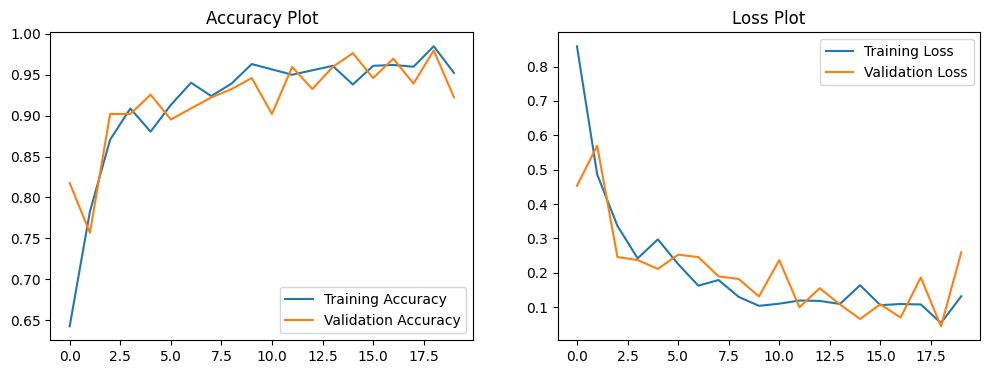

In [18]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Plot')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Plot')

plt.show()

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


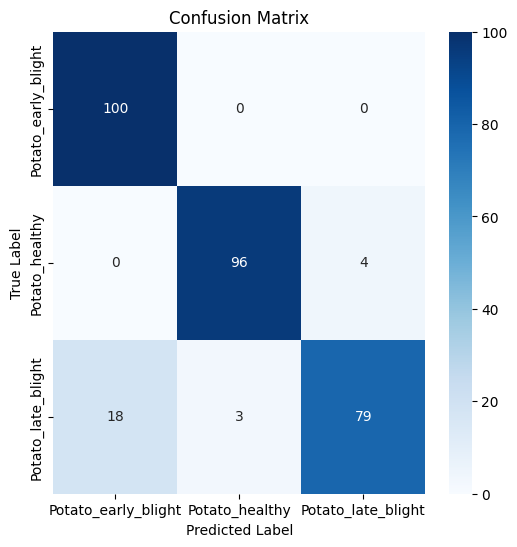

In [15]:
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1) # memilih jawaban dengan nilai tertinggi sebagai jawaban akhir model.

# Buat confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualisasi dengan heatmap
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**12. Simpan Model**

In [16]:
model.save('potato_disease_cnn_model.keras')

**13. Prediksi**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


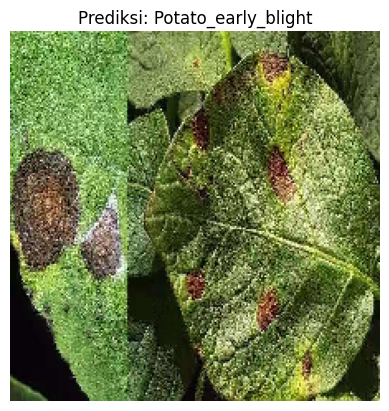

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


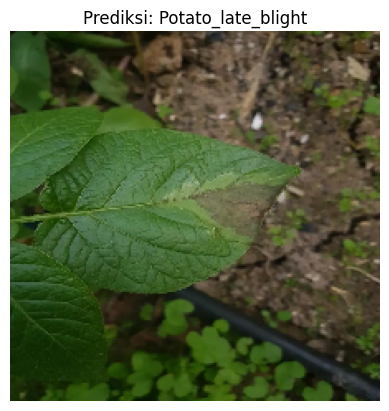

In [20]:
# Load Model yang Sudah Dilatih
model = tf.keras.models.load_model('potato_disease_cnn_model.keras')

# Fungsi untuk Prediksi Gambar
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))

    # Ubah gambar menjadi array numpy
    img_array = image.img_to_array(img)

    # Tambahkan batch dimension (dari (224,224,3) → (1,224,224,3))
    img_array = np.expand_dims(img_array, axis=0)

    # Normalisasi nilai pixel (sama seperti data training)
    img_array = img_array / 255.0

    # Prediksi menggunakan model
    prediction = model.predict(img_array)

    # Konversi hasil prediksi ke kelas
    class_indices = {v: k for k, v in test_generator.class_indices.items()}  # Dapatkan nama kelas
    predicted_class = class_indices[np.argmax(prediction)]  # Ambil kelas dengan probabilitas tertinggi

    # Tampilkan Gambar & Hasil Prediksi
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Prediksi: {predicted_class}')
    plt.show()

# Uji dengan Gambar Baru
img_path = "/content/drive/MyDrive/Colab Notebooks/Potato/Image/image1.jpg"
predict_image(img_path)

img_path = "/content/drive/MyDrive/Colab Notebooks/Potato/Image/image2.jpg"
predict_image(img_path)
